### 목표
- 붓꽃 꽃잎의 길이/너비, 꽃받침의 길이/ 너비 특징 4개를 활용하여 품종 3가지를 분류하는 모델을 만들어보자!
- 3개 이상의 클래스를 분류하는 것 => 다중분류
- knn모델의 이웃의 숫자를 조정해보자(k==n_neibors,하이퍼 파라미터 튜닝)

In [82]:
# 클래스가 2개일 경우 분류하는 것 binary => 이진분류

In [83]:
# 환경셋팅
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

#knn분류모델
from sklearn.neighbors import KNeighborsClassifier
# 모델의 성능 평가 지표 : 정확도
from sklearn.metrics import accuracy_score
# train, test 분리하는 도구 = 데이터를 훈련과 테스트용으로 분류해주는 도구
from sklearn.model_selection import train_test_split

### 2. 데이터 불러오기
- 크기 확인
- 형태확인
- 내부정보 확인


In [84]:
# sklearn -> datasets : bunch 객체 (데이터의 묶음)
# 아이리스 데이터를 변수에 담아줌
iris_data = load_iris()
iris_data




{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [85]:
# 딕셔너리 접근하는 방식과 동일하게 사용 가능
# 키값 확인
iris_data.keys()
# data : (필수) 문제, 특성, feature,피처,속성, 독립변수, 설명변수, array() 배열
# target : (필수) 타겟, 라벨, 레이블, label, 종속변수, 반응변수, array() 배열
# target_names : (옵션) 레이블 값에 대한 설명(실제이름), 종속 변수 이름 리스트
# feature_names : (옵션) 특성 이름에 대한 설명, 독립변수 이름 리스트
# DESCR : Describe() 기술통계량, 데이터 크기, 데이터 출처 설명

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [86]:
# 문제 데이터만 확ㅇ니
# data 키값 접근
iris_data['data']
# 1개행 : 1개 붓꽃 데이터 설명

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [87]:
# 특성 이름, 순서 확인(4가지의 특성) -독립
iris_data.feature_names


# 'sepal length (cm)' : 꽃받침의 길이
# 'sepal width (cm)' : 꽃받침의 너비
# 'petal length (cm)' : 꽃잎의 길이
# 'petal width (cm)' : 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [88]:
# target 답데이터 확인
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
#target 이름 확인
# 결과로 나올 3가지의 값 - 종속
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [90]:
# DESCR 어디에서 온 정보인지확인이 가능
iris_data.DESCR 

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

### 데이터셋 구성
- 보기 편한 형식으로 데이터 정리 해보기(나름의 전처리)
- 문제와 답 분리
- Train과 test로 분리

In [91]:
i_colunms = iris_data.feature_names
iris_df = pd.DataFrame(iris_data.data,columns=i_colunms)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
# 문제와 답
X = iris_df
y = iris_data.target
print('문제 : ' , X.shape, '답 :', y.shape)

문제 :  (150, 4) 답 : (150,)


In [93]:
# train , test 분리
# train_test_split 1) 행을 랜덤하게 섞음 2) 비율에 맞춰서 분리도 해줘~!~~!~
# 비율은 소숫점으로 써줘야함
# 숫자는 계속 변동이 됨 => 그걸 고정해주기위해서 random_state=1(이 숫자는 아무거나 상관X) 이라고 해줌
# train_test_split(문제, 답, 분리비율, 랜덤고정값)
# test_size : 실수형태로 숫자값 입력해야 비율적 의미가 됨
#             정수형태로 입력하면 해당 개수만큼 분리가 됨

X_train ,y_train ,X_test ,y_test = train_test_split(X,y,test_size=0.3) 
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
28,5.2,3.4,1.4,0.2
94,5.6,2.7,4.2,1.3
135,7.7,3.0,6.1,2.3
49,5.0,3.3,1.4,0.2
79,5.7,2.6,3.5,1.0
...,...,...,...,...
47,4.6,3.2,1.4,0.2
20,5.4,3.4,1.7,0.2
138,6.0,3.0,4.8,1.8
65,6.7,3.1,4.4,1.4


In [94]:
# random_state : 데이터를 랜덤하게 섞는 기능의 기준을 고정시키는 값
# 1로 숫자를 고정했는데 잘못분리가 된다면? 결과가 나쁘지 않을까..?
# 모델 학습에 대한 검증은 다른 방식 진행, 해당값이 정답인지 아닌지는 문제 X 
X_train ,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1) 


# 크기 확인
print('훈련용 문제 : ', X_train.shape)
print('훈련용 답 : ', y_train.shape)
print('테스트용 문제 : ', X_test.shape)
print('테스트용 답 : ', y_test.shape)

훈련용 문제 :  (112, 4)
훈련용 답 :  (112,)
테스트용 문제 :  (38, 4)
테스트용 답 :  (38,)


In [95]:
# 클래스별 개수 확인하기
# 데이터의 탐색할 때 train 기준으로 확인
# 7: 3 비율 분리 0.34285714, 0.3047619 , 0.35238095
np.bincount(y_train)/105
# 7.5 : 2.5 비율 분리 => 0.35238095, 0.32380952, 0.39047619

array([0.35238095, 0.32380952, 0.39047619])

### 탐색적 데이터 분석
- 시각화
- 특성끼리 연관지었을때 클래스(품종3개)가 잘 구분되는지 확인해보기
- 상관관계 확인! => 그래프 보면서 단순하게 확인

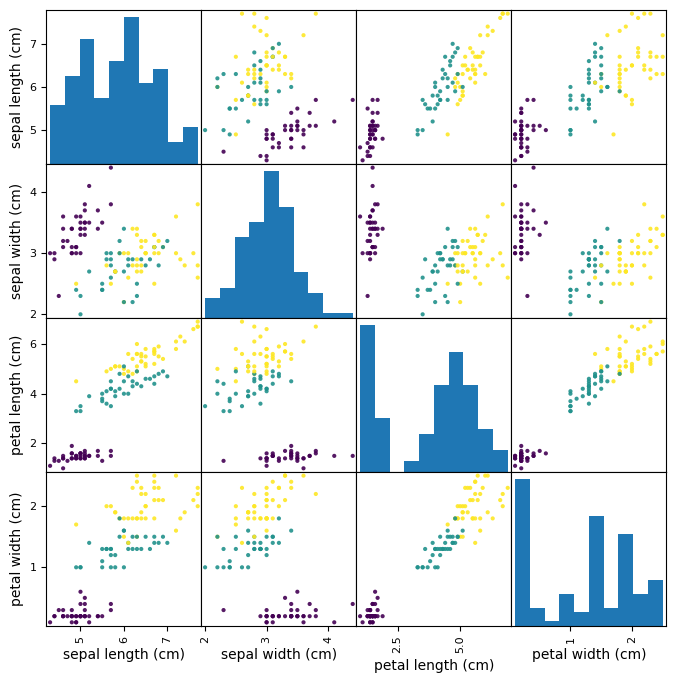

In [96]:
# 산점도 행렬(scatter matrix) : 한꺼번에 변수(특성)간의 관계를 일목요연하게 확인 가능
pd.plotting.scatter_matrix(X_train,figsize=(8,8),
                            c= y_train, alpha=0.9)
plt.show()
# c 라벨별로 색 설정
# alpha 투명도 설정

# 이 그래프에서 봐야하는 것
# 같은 품종 색 끼리 잘 뭉쳐져 있는거?
# 다른 풍종끼리 잘 분리가 되어있는가
# 위에 내용이 잘 진행된 특성의 결합은 뭘까?

### 모델링

In [97]:
# 학습
knn_model = KNeighborsClassifier()
# fit (훈련용 문제, 훈련용 답)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [98]:
# 예측
# predict(테스트용 문제)
pre = knn_model.predict(X_test)
print('-테스트 셋 전체를 이용한 예측 결과 값 : ',pre)
print('-예상되는 품종은?' ,iris_data.target_names)

-테스트 셋 전체를 이용한 예측 결과 값 :  [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
-예상되는 품종은? ['setosa' 'versicolor' 'virginica']


In [99]:
# pre할때마다 나오는 경고창 무시
import warnings
warnings.filterwarnings(action = 'ignore')

In [100]:
# 예측 결과값의 순서대로 가지고옴
iris_data.target_names[pre]

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [101]:
# 평가
# accuracy_score(실제값, 예측값) -> 정확도
accuracy_score(y_test,pre) # X_test 데이터 한번 사용 : 100% 맞춘 상태

1.0

In [102]:
# 모델안에 있는 평가 함수 사용해보기
# predict 과정 없이도 모델 정확도 성능 확인 가능
knn_model.score(X_test, y_test) # 정확도 평가 측정 지표

1.0

### 하이퍼 파라미터 튜닝
- 모델의 복잡도 곡선 그려서 확인
- 튜닝이 필요한지 판단하기
- 복잡도 제어 : knn -> 이웃의 개수(n_neighbors)

In [103]:
# train, test 정확도 담는 빈 리스트
train_acc = []
test_acc = []

#k의 범위, X_train.shape 112행(이웃의 범위는 112까지 설정 가능, 훈련데이터 포인트 개수 만큼)
n_range = range(1,51)

# k값을 바꾸면서 train, test 정확도 출력 => 저장
for k in n_range :
    # 모델 생성
    # 모델 학습
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)

    # train acc(정확도) 평가 -> train_acc 추가
    train_accuracy = model.score(X_train,y_train)
    train_acc.append(train_accuracy)

    # test acc(정확도) 평가 -> test_acc추가
    test_accuracy = model.score(X_test,y_test)
    test_acc.append(test_accuracy)


Text(0, 0.5, 'Acc')

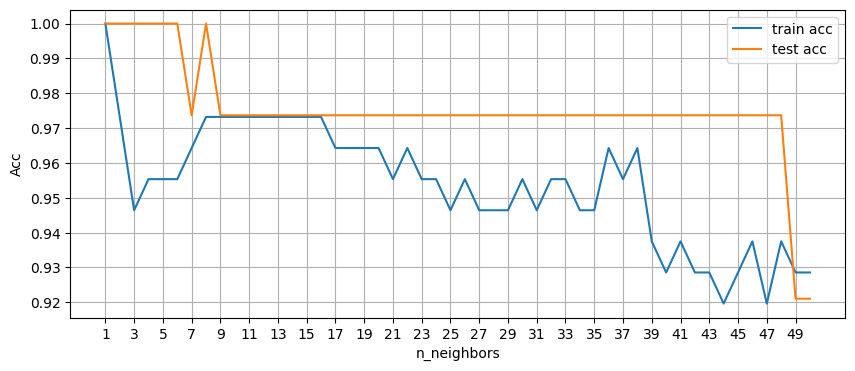

In [104]:
# 선그래프 그리기
plt.figure(figsize= (10,4)) # 그래프 크기 설정
# plt.plot(x축값 , y축값, 이름) #  선그래프 기본 값
plt.plot(n_range , train_acc ,label = 'train acc')  # 선 그래프 기본 값
plt.plot(n_range , test_acc ,label = 'test acc')  # 선 그래프 기본 값
plt.legend() # 범례 표시(출력)
plt.grid() # 격자 눈금선 출력
plt.xticks(range(1,51,2))
plt.xlabel('n_neighbors')  # x축 이름 설정
plt.ylabel('Acc')  # y축 이름 설정


In [ ]:
# k 값이 커지면 커질 수록 (train, test 정확도도 떨어지는 상황) -> 과소적합일 확률이 높음
# k 값이 너무 작은 경우에는 knn 특성상 과대적합에 걸릴 확률이 높음
# 현재 1일 떄는 train ,test 둘다 성능이 좋은 상태 => 과대적합 X


In [ ]:
# test가 쉬운 문제들만 담겨있을 수 있음 -> 검증 과정은 여러번 해볼 필요가 있음